In [1]:

####################################################################################################
####################################################################################################

import sys
import os.path

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.colors import Normalize

import numpy as np
import pandas as pd

from IPython.display import display

print(sys.version)
print(pd.__version__)


3.6.5 |Anaconda, Inc.| (default, Apr 29 2018, 16:14:56) 
[GCC 7.2.0]
0.23.4


In [11]:

####################################################################################################
####################################################################################################

#dir_pred = "sbatch/predictions/cpu/"
#file_hdf = dir_pred + 'dnn_s2waveforms-xy_ts0010_e50_mse_adam_ac9947_layers1270-1270-127-2.hdf5'

dir_pred = '/project/lgrandi/dbarge/reconstruction/xy_s2waveforms/sbatch/predictions/cpu/'

#file_hdf = 'dnn_s2waveforms-xy_ts0010_e10_mse_adam_ac9909_layers1270-1270-127-2.hdf5'
#file_hdf = 'dnn_s2waveforms-xy_ts0019_e10_mse_adam_ac9907_layers2413-1270-127-2.hdf5'
file_hdf = 'dnn_s2waveforms-xy_ts0025_e10_mse_adam_ac9911_layers3175-1270-127-2.hdf5'

file_hdf = dir_pred + file_hdf
df_xy    = pd.read_hdf(file_hdf)

#input_file2 = '/project/lgrandi/dbarge/simulation/wimp/pax_v6.8.3/merged/merged_all_200000.pkl'
input_file2 = '/project/lgrandi/dbarge/simulation/wimp/pax_v6.8.3/er/merged/merged_all_200000.pkl'
df_xy2      = pd.read_pickle(input_file2)
df_xy2      = df_xy2[df_xy2['intr_count'] == 1].reset_index(drop=True)
df_xy2      = df_xy2[100000:][:]
cols        = ['x', 'y', 'intr_x', 'intr_y', 'intr_x_nn', 'intr_y_nn']
df_xy2      = df_xy2[cols]


####################################################################################################
####################################################################################################

df_xy    = pd.read_hdf(file_hdf)
print(df_xy.shape)
display(df_xy[0:5][:])
print()

print(df_xy2.shape)
display(df_xy2[0:5][:])


(27826, 4)


,x_pred,y_pred,x_true,y_true
0,6.076554,-30.753592,7.332030,-30.591311
1,-13.167983,10.962021,-13.701462,12.687316
2,6.580128,4.186086,7.042967,4.772081
3,10.567113,31.535761,9.732044,31.983084
4,17.042620,31.580938,17.004166,32.997234



(27826, 6)


,x,y,intr_x,intr_y,intr_x_nn,intr_y_nn
100000,7.332030,-30.591311,5.640515,-25.802357,5.963322,-25.627516
100001,-13.701462,12.687316,-11.881086,10.920998,-12.208843,10.564307
100002,7.042967,4.772081,6.120559,4.440406,5.657052,3.909451
100003,9.732044,31.983084,9.720888,28.202577,10.374315,27.733961
100004,17.004165,32.997236,14.761349,28.682621,15.570843,28.051881


In [12]:

####################################################################################################
####################################################################################################

arr_x_tpf  = df_xy2[:]['intr_x'].values
arr_y_tpf  = df_xy2[:]['intr_y'].values

arr_x_nn   = df_xy2[:]['intr_x_nn'].values
arr_y_nn   = df_xy2[:]['intr_y_nn'].values

#arr_x_true  = df_xy[:]['x_true'].values
#arr_y_true  = df_xy[:]['y_true'].values

arr_x_true  = df_xy2[:]['x'].values
arr_y_true  = df_xy2[:]['y'].values

arr_x_pred  = df_xy[:]['x_pred'].values
arr_y_pred  = df_xy[:]['y_pred'].values

arr_dx_nn  = arr_x_true - arr_x_nn
arr_dy_nn  = arr_y_true - arr_y_nn

arr_dx_tpf  = arr_x_true - arr_x_tpf
arr_dy_tpf  = arr_y_true - arr_y_tpf

arr_dx_true_pred  = arr_x_true - arr_x_pred
arr_dy_true_pred  = arr_y_true - arr_y_pred

arr_dd_nn         = np.sqrt( np.square(arr_dx_nn)        + np.square(arr_dy_nn) )
arr_dd_tpf        = np.sqrt( np.square(arr_dx_tpf)       + np.square(arr_dy_tpf) )
arr_dd_true_pred  = np.sqrt( np.square(arr_dx_true_pred) + np.square(arr_dy_true_pred) )



In [13]:

####################################################################################################
####################################################################################################

x_mean_true  = np.mean(arr_x_true)
x_mean_pred  = np.mean(arr_x_pred)

x_std_true   = np.std(arr_x_true)
x_std_pred   = np.std(arr_x_pred)

y_mean_true  = np.mean(arr_y_true)
y_mean_pred  = np.mean(arr_y_pred)

y_std_true   = np.std(arr_y_true)
y_std_pred   = np.std(arr_y_pred)

# STD
dd_std_nn        = np.std (arr_dd_nn)
dd_std_tpf       = np.std (arr_dd_tpf)
dd_std_true_pred = np.std (arr_dd_true_pred)

dx_std_nn        = np.std (arr_dx_nn)
dx_std_tpf       = np.std (arr_dx_tpf)
dx_std_true_pred = np.std (arr_dx_true_pred)

#dy_std_true_pred = np.std (arr_dy_true_pred)

# Mean
dd_mean_nn        = np.mean(arr_dd_nn)
dd_mean_tpf       = np.mean(arr_dd_tpf)
dd_mean_true_pred = np.mean(arr_dd_true_pred)

dx_mean_nn        = np.mean(arr_dx_nn)
dx_mean_tpf       = np.mean(arr_dx_tpf)
dx_mean_true_pred = np.mean(arr_dx_true_pred)



####################################################################################################
####################################################################################################

print(dd_mean_nn)

label_x_true = '%5s (std: %.02f, mean: %.02f)' % ( 'True', x_std_true, x_mean_true )
label_x_pred = '%5s (std: %.02f, mean: %.02f)' % ( 'Pred', x_std_pred, x_mean_pred )

label_y_true = '%5s (std: %.02f, mean: %.02f)' % ( 'True', y_std_true, y_mean_true )
label_y_pred = '%5s (std: %.02f, mean: %.02f)' % ( 'Pred', y_std_pred, y_mean_pred )

dd_label_nn        = '%18s ($\mu$ = %.02f, $\sigma$ = %.02f)' % ( 'Xe1T NN          ', dd_mean_nn       , dd_std_nn )
dd_label_tpf       = '%18s ($\mu$ = %.02f, $\sigma$ = %.02f)' % ( 'Xe1T TPF         ', dd_mean_tpf      , dd_std_tpf )
dd_label_true_pred = '%18s ($\mu$ = %.02f, $\sigma$ = %.02f)' % ( 'TD-NN (this work)', dd_mean_true_pred, dd_std_true_pred )

dx_label_nn        = '%5s ($\mu$ = %.02f, $\sigma$ = %.02f)' % ( 'Xe1T NN $\Delta$X ' , dx_mean_nn       , dx_std_nn )
dx_label_tpf       = '%5s ($\mu$ = %.02f, $\sigma$ = %.02f)' % ( 'Xe1T TPF $\Delta$X ', dx_mean_tpf      , dx_std_tpf )
dx_label_true_pred = '%5s ($\mu$ = %.02f, $\sigma$ = %.02f)' % ( 'TD-NN $\Delta$X '   , dx_mean_true_pred, dx_std_true_pred )

#dy_label_true_pred = '%5s ($\mu$ = %.02f, $\sigma$ = %.02f)' % ( '$\Delta$Y ', dy_mean_true_pred, dy_std_true_pred )



####################################################################################################
# Overflow & Underflow
####################################################################################################

dd_max   = 5.5

arr_dd_nn        = np.clip(arr_dd_nn       , 0, dd_max)
arr_dd_tpf       = np.clip(arr_dd_tpf      , 0, dd_max)
arr_dd_true_pred = np.clip(arr_dd_true_pred, 0, dd_max)

#arr_dx_true_pred = np.clip(arr_dx_true_pred, -dr_max, dr_max)
#arr_dy_true_pred = np.clip(arr_dy_true_pred, -dr_max, dr_max)

#print(arr_dd_true_pred.shape)
#print(arr_dx_true_pred.shape)
#print(arr_dy_true_pred.shape)



2.194821445205301


(27826,)
(27826,)
(27826,)


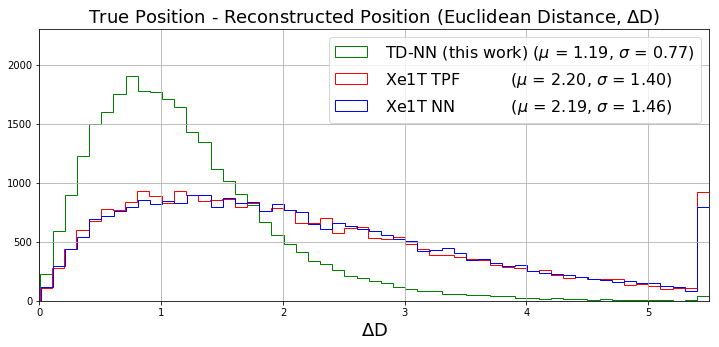

In [14]:
print(arr_dd_nn.shape)
print(arr_dd_tpf.shape)
print(arr_dd_true_pred.shape)


####################################################################################################
# Resolution - Prediction
####################################################################################################

w, h = 12, 5

dd_nbins = 55
dr_nbins = 6*10*2

# Euclidean
f = plt.figure(figsize=(w, h))

plt.hist(arr_dd_true_pred, bins=dd_nbins, histtype='step', color='g', label=dd_label_true_pred)
plt.hist(arr_dd_nn       , bins=dd_nbins, histtype='step', color='r', label=dd_label_tpf)
plt.hist(arr_dd_tpf      , bins=dd_nbins, histtype='step', color='b', label=dd_label_nn)

plt.xlim([0, dd_max])
plt.ylim([0, 1.15*plt.gca().get_ylim()[1]])
plt.title('True Position - Reconstructed Position (Euclidean Distance, $\Delta$D)', fontsize=18)
plt.xlabel('$\Delta$D', fontsize=18)
plt.legend(fontsize=16)
plt.grid(True)




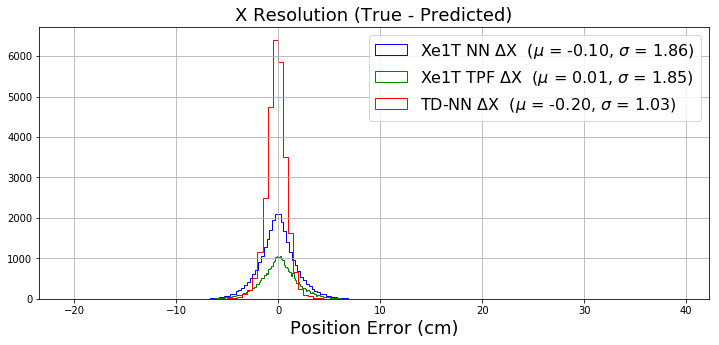

In [8]:


# X, Y
f = plt.figure(figsize=(w, h))
plt.hist(arr_dx_nn       , bins=dr_nbins, histtype='step', color='b', label=dx_label_nn)
plt.hist(arr_dx_tpf      , bins=dr_nbins, histtype='step', color='g', label=dx_label_tpf)
plt.hist(arr_dx_true_pred, bins=dr_nbins, histtype='step', color='r', label=dx_label_true_pred)

#plt.hist(arr_dy_true_pred, bins=dr_nbins, histtype='step', color='g')#, label=dy_label_true_pred)
#plt.ylim([0, 1.15*plt.gca().get_ylim()[1]])
plt.title('X Resolution (True - Predicted)', fontsize=18)
plt.xlabel('Position Error (cm)', fontsize=18)
plt.legend(fontsize=16)
plt.grid(True)


In [9]:

####################################################################################################
# Position
####################################################################################################

# x, y
#f = plt.figure(figsize=(10, 8))
#plt.hist2d(arr_x_true, arr_y_true, bins=r_nbins, norm=Normalize(), normed=False, cmin=0.1)
#plt.colorbar()

# x
f = plt.figure(figsize=(w, h))
plt.hist(arr_x_true, bins=r_nbins, fill=False, histtype='step', label=label_x_true)
plt.hist(arr_x_pred, bins=r_nbins, fill=False, histtype='step', label=label_x_pred)
plt.xlabel('X (cm)', fontsize=18)
plt.title('X Position', fontsize=18)
plt.legend(loc='lower center', fontsize=16)
plt.grid(True)

# y
f = plt.figure(figsize=(w, h))
plt.hist(arr_y_true, bins=r_nbins, fill=False, histtype='step', label=label_y_true)
plt.hist(arr_y_pred, bins=r_nbins, fill=False, histtype='step', label=label_y_pred)
plt.xlabel('Y (cm)', fontsize=18)
plt.title('Y Position', fontsize=18)
plt.legend(loc='lower center', fontsize=16)
plt.grid(True)



NameError: name 'r_nbins' is not defined

<Figure size 864x360 with 0 Axes>